In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import xgboost
print(xgboost.__version__)

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

1.6.1


In [3]:
key_char = pd.read_csv('key_characteristics.csv')
key_char.drop(key_char.columns[key_char.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
key_char.head()

,URBRRL,RATCAT_A,INCGRP_A,FAMINCTC_A,RACEALLP_A,BMICAT_A,WEIGHTLBTC_A,HEIGHTTC_A,PCNTTC,NOTCOV_A,...,MARITAL_A,SMKEV_A,LASTDR_A,PAYBLL12M_A,DIBEV_A,PREDIB_A,CANEV_A,ASEV_A,POVRATTC_A,DEPEV_A
0,4,9,3,60000,2,3,201,71,3,2,...,1,2,1,2,2,2,2,2,2.96,2
1,4,9,3,50000,1,2,130,62,2,2,...,1,1,1,2,2,2,2,2,2.97,2
2,4,12,3,65000,1,3,215,74,2,2,...,1,2,1,2,2,1,1,2,4.28,2
3,4,14,5,120000,8,4,290,72,2,2,...,1,2,1,2,2,2,2,2,7.13,2
4,1,4,1,30000,1,4,290,72,4,2,...,1,1,1,1,1,1,2,1,1.13,1


In [4]:
X = key_char.drop(['DEPEV_A'], axis=1)
y = key_char['DEPEV_A']

In [16]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [18]:
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [19]:
classifier.score(X_train, y_train)

0.9076218942648981

In [20]:
y_pred = classifier.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 14.12%


In [21]:
classifier.score(X_test, y_test)

0.14117758604342467

In [22]:
feature_importances=pd.DataFrame({'features':X.columns,'feature_importance':classifier.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

,features,feature_importance
14,SEX_A,0.109321
24,PAYBLL12M_A,0.090778
28,ASEV_A,0.070393
22,SMKEV_A,0.048637
19,NATUSBORN_A,0.044747
23,LASTDR_A,0.036890
4,RACEALLP_A,0.034706
12,HISP_A,0.033404
21,MARITAL_A,0.031570
3,FAMINCTC_A,0.030788


In [23]:
print(classifier.feature_importances_)

[0.02026255 0.01675083 0.02189154 0.03078824 0.0347061  0.02404506
 0.0225569  0.02084527 0.02337986 0.02111661 0.02189338 0.02376905
 0.03340447 0.02280748 0.10932074 0.02551462 0.02486239 0.02779296
 0.02918765 0.04474708 0.02809931 0.03157025 0.04863736 0.03689045
 0.09077834 0.02284905 0.02392606 0.02363036 0.07039345 0.02358264]


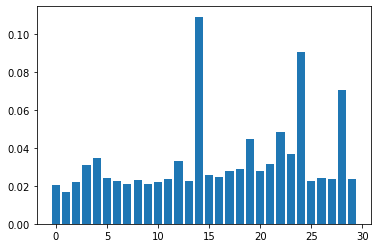

In [24]:
plt.bar(range(len(classifier.feature_importances_)), classifier.feature_importances_)
plt.show()

In [11]:
X = X.astype(int)

In [5]:
cat_features = list(range(0, X.shape[1]))
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=5, 
    learning_rate=0.1, 
    #loss_function='CrossEntropy'
)

clf.fit(X_train, y_train, 
        cat_features=cat_features, 
        eval_set=(X_test, y_test), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')
print(clf.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 5, 'learning_rate': 0.1}


In [14]:
clf = CatBoostClassifier(
    iterations=10,
#     verbose=5,
)

clf.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_test, y_test),
)

Learning rate set to 0.5
0:	learn: 0.6645019	test: 0.6666936	best: 0.6666936 (0)	total: 59.4ms	remaining: 534ms
1:	learn: 0.5443114	test: 0.5467971	best: 0.5467971 (1)	total: 108ms	remaining: 430ms
2:	learn: 0.4944661	test: 0.4975934	best: 0.4975934 (2)	total: 123ms	remaining: 286ms
3:	learn: 0.4593545	test: 0.4628719	best: 0.4628719 (3)	total: 171ms	remaining: 257ms
4:	learn: 0.4379763	test: 0.4434462	best: 0.4434462 (4)	total: 224ms	remaining: 224ms
5:	learn: 0.4274110	test: 0.4337393	best: 0.4337393 (5)	total: 253ms	remaining: 169ms
6:	learn: 0.4208678	test: 0.4282254	best: 0.4282254 (6)	total: 299ms	remaining: 128ms
7:	learn: 0.4161351	test: 0.4240199	best: 0.4240199 (7)	total: 349ms	remaining: 87.2ms
8:	learn: 0.4130599	test: 0.4217868	best: 0.4217868 (8)	total: 395ms	remaining: 43.9ms
9:	learn: 0.4102846	test: 0.4204346	best: 0.4204346 (9)	total: 449ms	remaining: 0us

bestTest = 0.4204346013
bestIteration = 9



In [15]:
clf.score(X_train, y_train)

0.8359213048069778

In [16]:
clf.score(X_test, y_test)

0.8324468085106383

In [23]:
y_predict= clf.predict(X_test)
#RMSE
Rmse_test = math.sqrt(mean_squared_error(y_test,y_predict))
#R2 Score
r2_test = r2_score(y_test,y_predict)
# Adjusted R2 Score
n= X_train.shape[0] # total no of datapoints
p= X_train.shape[1] # total no of independent features
adj_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
#print results
print("Evaluation on train data")
print("RMSE: {:.2f}".format(Rmse_test))
print("R2: {:.2f}".format(r2_test))
print("Adjusted R2: {:.2f}".format(adj_r2_test))

Evaluation on train data
RMSE: 0.47
R2: -0.11
Adjusted R2: -0.12


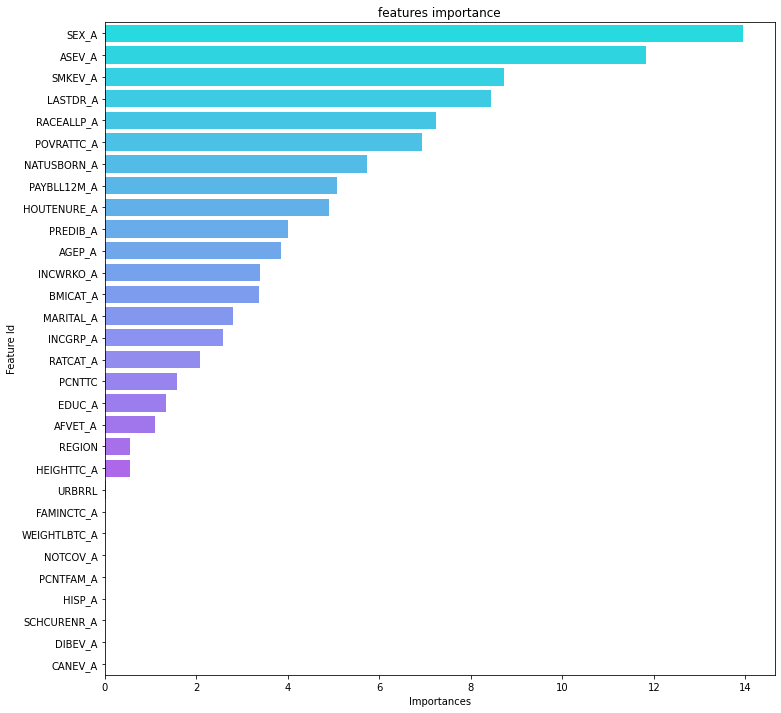

In [29]:
df_feature_importance = pd.DataFrame(clf.get_feature_importance(prettified=True))

plt.figure(figsize=(12, 12));
feature_plot= sns.barplot(x="Importances", y="Feature Id", data=df_feature_importance,palette="cool");
plt.title('features importance');